In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
df_temp = pd.read_csv('county_historic_temperatures.csv')
df_covid = pd.read_csv('covid_confirmed_usafacts.csv')
df_covid['County Name'] = df_covid['County Name'].str.strip()



df_collection = []

for i in range(50):
    
    fname_p1 = df_temp['County'].iloc[i]
    fname_p2 = df_temp['State'].iloc[i]
    fname_full = f'{fname_p1}-{fname_p2}_historic_weather.csv'
    
    if os.path.exists(fname_full):

        df_county_weather = pd.read_csv(fname_full)
        df_interim = pd.merge(df_county_weather, df_temp, \
                    left_on=['STATION'], right_on=['station_code'])

        # Should not have to do this, but didn't filter stations correctly
        if 'TMIN' in df_interim.columns:
            df_post = pd.merge(
                df_interim,
                df_covid[(df_covid['County Name'] == df_interim.iloc[i]['County']) & (df_covid['State'] == df_interim.iloc[i]['State'])].T,
                left_on=['DATE'], right_index=True
            )
            df_post['new_cases'] = df_post.iloc[:, -1] - df_post.iloc[:, -1].shift(1)
            # df_post

            df_collection.append(df_post[['DATE', 'STATION', 'TMAX', 'TMIN', 'State', 'population', 'County', 'Latitude', 'Longitude', 'new_cases']])


In [3]:
df_covid

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2021-07-27,2021-07-28,2021-07-29,2021-07-30,2021-07-31,2021-08-01,2021-08-02,2021-08-03,2021-08-04,2021-08-05
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,7456,7479,7479,7479,7579,7593,7602,7615,7635,7670
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,24213,24499,24499,24499,25421,25565,25697,25860,26175,26472
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,2451,2462,2462,2462,2517,2523,2529,2537,2543,2562
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,2829,2845,2845,2845,2915,2919,2921,2928,2937,2960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,56037,Sweetwater County,WY,56,0,0,0,0,0,0,...,4955,4968,4990,4998,4998,4998,5017,5017,5042,5048
3189,56039,Teton County,WY,56,0,0,0,0,0,0,...,3881,3883,3897,3897,3897,3897,3914,3914,3938,3950
3190,56041,Uinta County,WY,56,0,0,0,0,0,0,...,2382,2384,2401,2414,2414,2414,2430,2430,2464,2482
3191,56043,Washakie County,WY,56,0,0,0,0,0,0,...,944,945,945,945,945,945,945,945,949,950


In [4]:
df_temp

,State,population,County,Latitude,Longitude,station_code
0,CA,10039107,Los Angeles County,34.196398,–118.261862,USR0000CBIP
1,IL,5150233,Cook County,41.894294,–87.645455,US1ILCK0332
2,TX,4713325,Harris County,29.857273,–95.393037,US1TXHRR286
3,AZ,4485414,Maricopa County,33.346541,–112.495534,US1AZMR0577
4,CA,3338330,San Diego County,33.023604,–116.776117,USR0000CCAM
...,...,...,...,...,...,...
2973,NE,465,Blaine County,41.925230,–99.990771,NaN
2974,NE,463,Arthur County,41.570856,–101.697045,NaN
2975,TX,404,Kenedy County,26.890232,–97.591233,NaN
2976,TX,272,King County,33.614159,–100.250548,NaN


In [5]:
df = pd.concat(df_collection)
df

,DATE,STATION,TMAX,TMIN,State,population,County,Latitude,Longitude,new_cases
0,2020-09-01,USR0000CBIP,272.0,172.0,CA,10039107,Los Angeles County,34.196398,–118.261862,NaN
1,2020-09-02,USR0000CBIP,283.0,167.0,CA,10039107,Los Angeles County,34.196398,–118.261862,1414
2,2020-09-03,USR0000CBIP,300.0,172.0,CA,10039107,Los Angeles County,34.196398,–118.261862,1064
3,2020-09-04,USR0000CBIP,311.0,189.0,CA,10039107,Los Angeles County,34.196398,–118.261862,1408
4,2020-09-05,USR0000CBIP,306.0,211.0,CA,10039107,Los Angeles County,34.196398,–118.261862,1135
...,...,...,...,...,...,...,...,...,...,...
329,2021-07-27,USC00403447,339.0,233.0,TN,937166,Shelby County,35.183794,–89.895397,269
330,2021-07-28,USC00403447,339.0,233.0,TN,937166,Shelby County,35.183794,–89.895397,348
331,2021-07-30,USC00403447,350.0,239.0,TN,937166,Shelby County,35.183794,–89.895397,918
332,2021-07-31,USC00403447,350.0,244.0,TN,937166,Shelby County,35.183794,–89.895397,0


### Machine Learning Section

In [6]:
df['County'].value_counts()

Riverside County         335
Salt Lake County         335
Los Angeles County       335
Fresno County            335
Clark County             335
Pima County              335
San Bernardino County    335
King County              335
Contra Costa County      334
Santa Clara County       334
Orange County            334
Shelby County            334
Miami-Dade County        334
San Diego County         334
Name: County, dtype: int64

In [40]:
df2 = df.dropna(subset=['TMAX', 'TMIN', 'new_cases'])
# df2 = df2[df2['County'] == 'Maricopa County']

columns = ['TMAX', 'TMIN', 'County']
X = df2[columns]
y = df2['new_cases']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.16)
# X_train, y_train = X, y
# X_test, y_test = X, y

cat_cols = ['County']
ohe = OneHotEncoder()
num_cols = ['TMAX', 'TMIN']
poly = PolynomialFeatures(degree=2)
linear = LinearRegression()
ct = make_column_transformer( (ohe, cat_cols), \
                              (poly, num_cols), \
                              remainder='passthrough' )

model = make_pipeline(ct, linear)

model.fit(X_train, y_train)

r2 = model.score(X_test, y_test)
preds = model.predict(X_test)
mae = mean_absolute_error(preds, y_test)
mse = mean_squared_error(preds, y_test)
print("R2 =", r2)
print("MAE =", mae)
print("RMSE =", sqrt(mse))

R2 = 0.21613746199087047
MAE = 632.0337936916276
RMSE = 1138.4322700008197


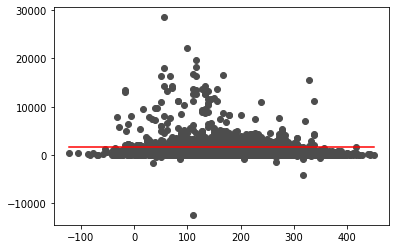

In [41]:
plt.scatter(X['TMAX'], y, color='0.3')
min_ = int(X['TMAX'].min())
max_ = int(X['TMAX'].max())
xs = np.linspace(min_, max_, (max_-min_))
plt.plot(xs, linear.intercept_ + linear.coef_[-2] * xs, color='red')

plt.show()

In [9]:
linear.intercept_, linear.coef_, len(linear.coef_)

(1662.935684000974,
 array([-3.76262883e+02, -4.60688727e+02, -5.02756636e+02, -8.81342311e+02,
         2.16725450e+03,  8.16985161e+02,  1.14694236e+02, -1.54847673e+02,
         3.79910267e+02, -6.57476562e+02,  1.73673094e+01,  2.94425239e+02,
        -3.22799368e+02, -4.34462557e+02, -5.03110336e+00,  5.58317498e-01]),
 16)

### Try ten random splits

In [39]:
r2s = []
maes = []
rmses = []

# for degree in range(1, 6):
for _ in range(10):
    X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.16)
    # X_train, y_train = X, y
    # X_test, y_test = X, y

    cat_cols = ['County']
    ohe = OneHotEncoder()
    num_cols = ['TMAX', 'TMIN']
    poly = PolynomialFeatures(degree=2)
    linear = LinearRegression()
    ct = make_column_transformer( (ohe, cat_cols), \
                                  (poly, num_cols), \
                                  remainder='passthrough' )

    model = make_pipeline(ct, linear)

    model.fit(X_train, y_train)

    r2 = model.score(X_test, y_test)
    preds = model.predict(X_test)
    mae = mean_absolute_error(preds, y_test)
    mse = mean_squared_error(preds, y_test)

    r2s.append(r2)
    maes.append(mae)
    rmses.append(sqrt(mse))

    print("R2 =", r2)
    print("MAE =", mae)
    print("RMSE =", sqrt(mse))

R2 = 0.15069836431447892
MAE = 666.4730059020974
RMSE = 1249.3204462605281
R2 = 0.19478215969668855
MAE = 670.1561174645157
RMSE = 1525.113210668638
R2 = 0.1921170131320712
MAE = 614.1333493789193
RMSE = 1123.6117903708991
R2 = 0.20491073575204544
MAE = 738.3425037400306
RMSE = 1532.1314042565905
R2 = 0.15928047238541032
MAE = 626.1728533035717
RMSE = 1135.665998356619
R2 = 0.2697250161114394
MAE = 653.503397471783
RMSE = 1314.2203662409315
R2 = 0.11248894550838029
MAE = 699.7858704398847
RMSE = 1238.8025632759284
R2 = 0.305354041244585
MAE = 657.1458092251997
RMSE = 1365.0321296335733
R2 = 0.2352491733530918
MAE = 800.7810581955089
RMSE = 1736.007309222412
R2 = 0.15808531755357869
MAE = 646.9743847031111
RMSE = 1171.3713971604611


In [38]:
for j in range(0, 41, 10):
#     j = 0
    print(np.mean(r2s[j:j+10]), np.mean(rmses[j:j+10]), np.mean(maes[j:j+10]),)


0.21072803416460234 1476.481922412835 715.2431939201291
0.22799981629006089 1380.8939203485168 684.164641618486
0.2218960205906982 1472.7508222210738 704.9309377653316
0.19646758591136185 1450.7028013718232 695.2372301672881
0.226717832027939 1455.8246133167945 712.6747397361905
